<a href="https://colab.research.google.com/github/matildecanete/Proyecto-Elegibilidad-tarjeta-de-credito/blob/main/Elegibilidad_tarjeta_de_cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

In [4]:
df = pd.read_csv('/content/tarjetadecredito.csv.zip')
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [5]:
df.drop(columns= 'ID', inplace=True)

In [8]:
df_shape = pd.DataFrame({'Filas': [df.shape[0]], 'Columnas': [df.shape[1]]})
print(df_shape.to_string(index=False))

 Filas  Columnas
  9709        19


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           9709 non-null   int64  
 1   Own_car          9709 non-null   int64  
 2   Own_property     9709 non-null   int64  
 3   Work_phone       9709 non-null   int64  
 4   Phone            9709 non-null   int64  
 5   Email            9709 non-null   int64  
 6   Unemployed       9709 non-null   int64  
 7   Num_children     9709 non-null   int64  
 8   Num_family       9709 non-null   int64  
 9   Account_length   9709 non-null   int64  
 10  Total_income     9709 non-null   float64
 11  Age              9709 non-null   float64
 12  Years_employed   9709 non-null   float64
 13  Income_type      9709 non-null   object 
 14  Education_type   9709 non-null   object 
 15  Family_status    9709 non-null   object 
 16  Housing_type     9709 non-null   object 
 17  Occupation_typ

>No hay valores nulos.

>Las columnas corresponden a su tipo.

In [ ]:
df.duplicated().sum()

0

>No hay valores duplicados.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,9709.0,0.348749,0.476599,0.000000,0.000000,0.000000,1.000000,1.000000e+00
Own_car,9709.0,0.367700,0.482204,0.000000,0.000000,0.000000,1.000000,1.000000e+00
Own_property,9709.0,0.671542,0.469677,0.000000,0.000000,1.000000,1.000000,1.000000e+00
Work_phone,9709.0,0.217427,0.412517,0.000000,0.000000,0.000000,0.000000,1.000000e+00
Phone,9709.0,0.287671,0.452700,0.000000,0.000000,0.000000,1.000000,1.000000e+00
Email,9709.0,0.087548,0.282650,0.000000,0.000000,0.000000,0.000000,1.000000e+00
Unemployed,9709.0,0.174683,0.379716,0.000000,0.000000,0.000000,0.000000,1.000000e+00
Num_children,9709.0,0.422804,0.767019,0.000000,0.000000,0.000000,1.000000,1.900000e+01
Num_family,9709.0,2.182614,0.932918,1.000000,2.000000,2.000000,3.000000,2.000000e+01
Account_length,9709.0,27.270059,16.648057,0.000000,13.000000,26.000000,41.000000,6.000000e+01


Identificar inconsistencias en los datos para los valores numéricos.

In [10]:
print(df['Gender'].value_counts(), end = "\n\n")
print(df['Own_car'].value_counts(), end = "\n\n")
print(df['Own_property'].value_counts(), end = "\n\n")
print(df['Work_phone'].value_counts(), end = "\n\n")
print(df['Phone'].value_counts(), end = "\n\n")
print(df['Email'].value_counts(), end = "\n\n")
print(df['Unemployed'].value_counts(), end = "\n\n")
print(df['Num_children'].value_counts(), end = "\n\n")
print(df['Num_family'].value_counts(), end = "\n\n")
print(df['Account_length'].value_counts(), end = "\n\n")
print(df['Total_income'].value_counts(), end = "\n\n")
print(df['Age'].value_counts(), end = "\n\n")
print(df['Years_employed'].value_counts(), end = "\n\n")
print(df['Target'].value_counts(), end = "\n\n")

Gender
0    6323
1    3386
Name: count, dtype: int64

Own_car
0    6139
1    3570
Name: count, dtype: int64

Own_property
1    6520
0    3189
Name: count, dtype: int64

Work_phone
0    7598
1    2111
Name: count, dtype: int64

Phone
0    6916
1    2793
Name: count, dtype: int64

Email
0    8859
1     850
Name: count, dtype: int64

Unemployed
0    8013
1    1696
Name: count, dtype: int64

Num_children
0     6819
1     1886
2      852
3      126
4       18
5        5
14       1
19       1
7        1
Name: count, dtype: int64

Num_family
2     5183
1     1947
3     1635
4      802
5      117
6       18
7        4
15       1
20       1
9        1
Name: count, dtype: int64

Account_length
11    219
13    216
7     215
16    212
5     211
     ... 
55    101
60    100
59     98
57     90
0      57
Name: count, Length: 61, dtype: int64

Total_income
135000.0    1139
180000.0     845
112500.0     843
157500.0     829
225000.0     750
            ... 
159750.0       1
91530.0        1
97731.0  

>No hay valores inconsistentes en las columnas numéricas.

Identificar inconsistencias en los datos para los valores categóricos.

In [11]:
print(df['Income_type'].value_counts(), end = "\n\n")
print(df['Education_type'].value_counts(), end = "\n\n")
print(df['Family_status'].value_counts(), end = "\n\n")
print(df['Housing_type'].value_counts(), end = "\n\n")
print(df['Occupation_type'].value_counts(), end = "\n\n")

Income_type
Working                 4960
Commercial associate    2312
Pensioner               1712
State servant            722
Student                    3
Name: count, dtype: int64

Education_type
Secondary / secondary special    6761
Higher education                 2457
Incomplete higher                 371
Lower secondary                   114
Academic degree                     6
Name: count, dtype: int64

Family_status
Married                 6530
Single / not married    1359
Civil marriage           836
Separated                574
Widow                    410
Name: count, dtype: int64

Housing_type
House / apartment      8684
With parents            448
Municipal apartment     323
Rented apartment        144
Office apartment         76
Co-op apartment          34
Name: count, dtype: int64

Occupation_type
Other                    2994
Laborers                 1724
Sales staff               959
Core staff                877
Managers                  782
Drivers                 

>No hay valores inconsistentes en las columnas categóricas.

**Visualizaciones**

        count
Target       
0        8426
1        1283


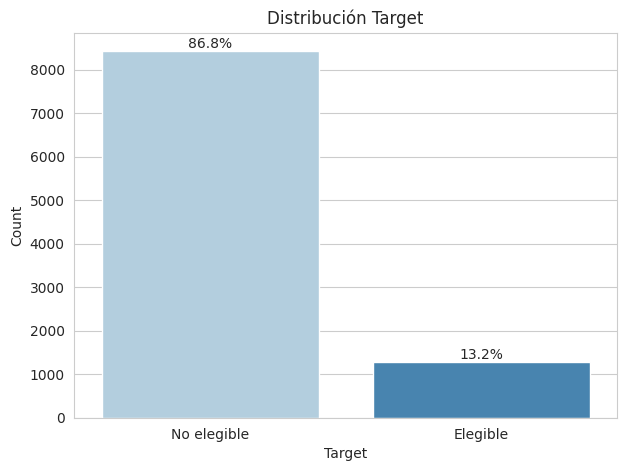

In [34]:
#Distribución Target
print(df.Target.value_counts().to_frame())

sns.set_style('whitegrid')
plt.figure(figsize=(7, 5))
palette = 'crest'
ax = sns.countplot(data=df, x='Target', hue='Target', palette='Blues', legend=False)

total = len(df['Target'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, percentage, ha='center', va='bottom')

ax.set_xticks([0, 1])
ax.set_xticklabels(['No elegible', 'Elegible'])
plt.xlabel('Target')
plt.title('Distribución Target', size=12)
plt.ylabel('Count', size=10)
plt.show()

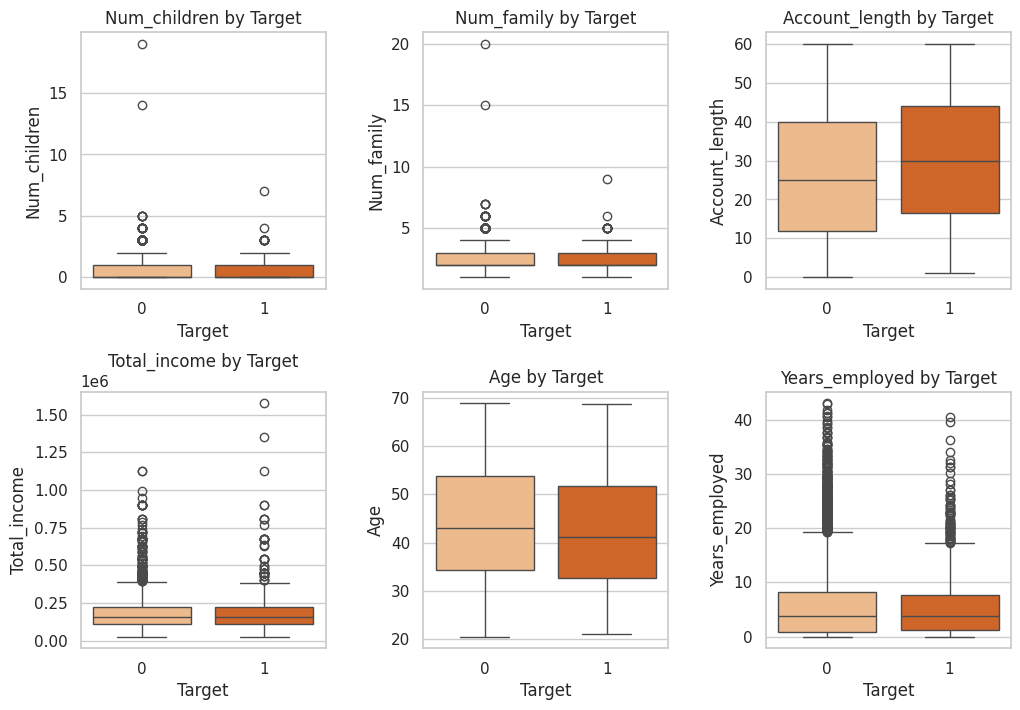

In [129]:
#Boxplot by Target
variables = [col for col in df.columns if col in ['Age', 'Total_income', 'Years_employed', 'Num_children', 'Num_family', 'Account_length']]
titles = [f'{col} by Target' for col in variables]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, (var, title) in enumerate(zip(variables, titles)):
    sns.boxplot(data=df, x='Target', y=var, hue='Target', palette='Oranges', legend=False, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(title)

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

>Se observan outliers en las características Num_children, Num_family, Total_income y Years_employed.

>Los clientes no elegibles tienen una frecuencia de edad ligeramente menor en comparación con los clientes elegibles. Sin embargo, los clientes elegibles muestran una mayor antigüedad en el banco.

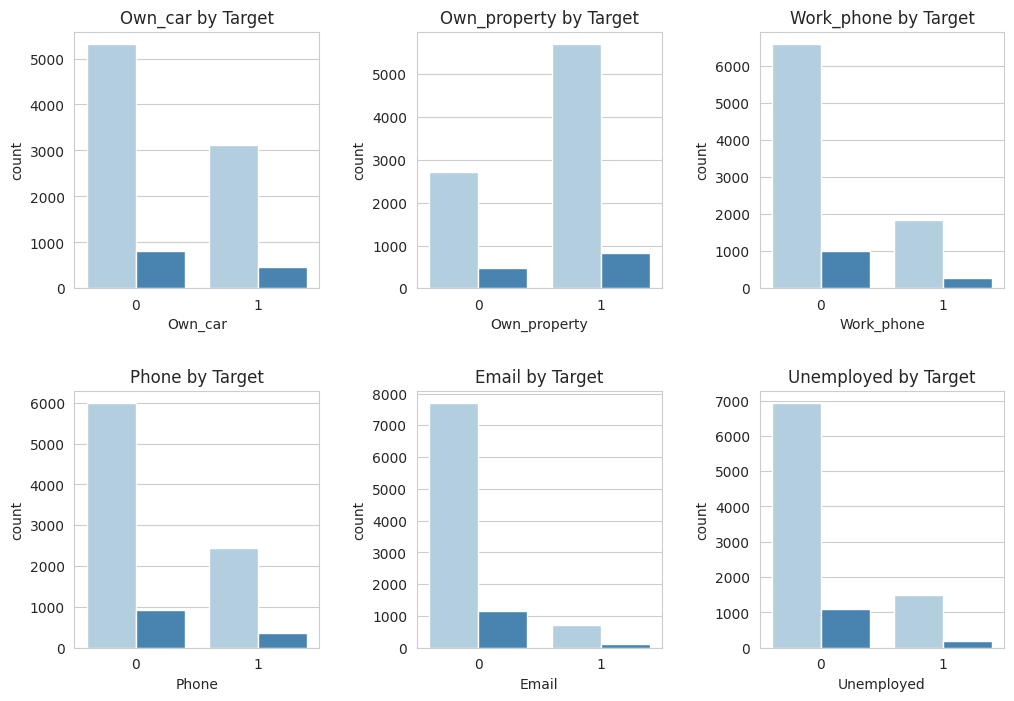

In [22]:
#Countplot by Target
variables = ['Own_car', 'Own_property', 'Work_phone', 'Phone', 'Email', 'Unemployed']
titles = [f"{var} by Target" for var in variables]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, (var, title) in enumerate(zip(variables, titles)):
    sns.countplot(data=df, x=var, hue='Target', palette='Blues', legend=False, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(title)

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

>Los clientes no elegibles predominan en las categorías de teléfono de trabajo, teléfono, correo electrónico y desempleo. Aunque también predominan entre los clientes con auto propio, la frecuencia de clientes elegibles con auto propio no es baja. Sin embargo, los clientes elegibles muestran una mayor frecuencia en la propiedad propia y en la empleabilidad, lo que podría sugerir que son clientes más estables económicamente.

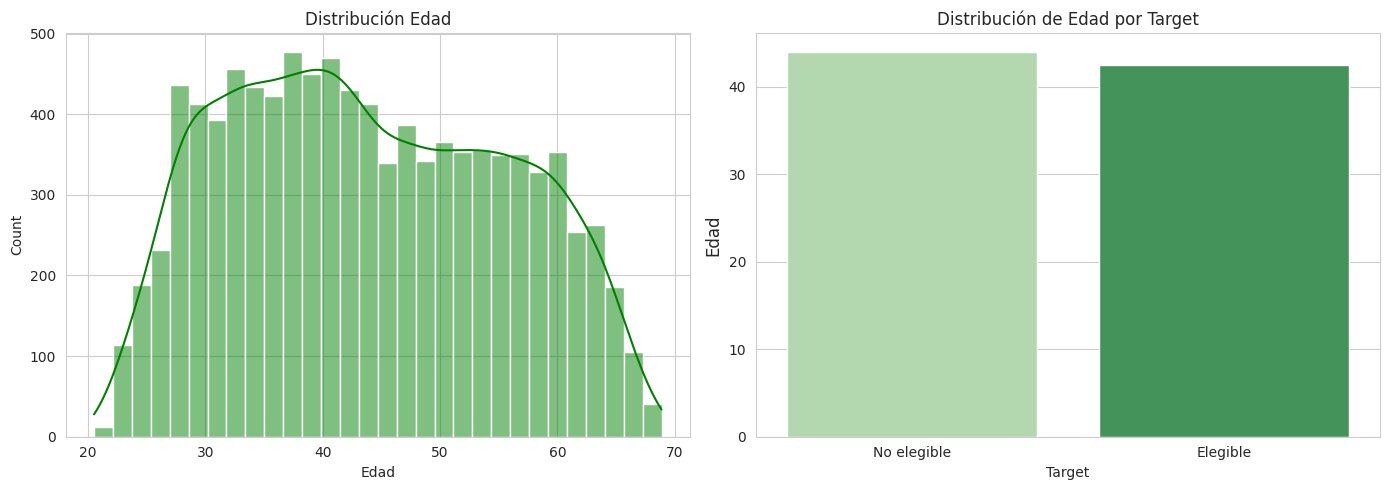

In [50]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
#Distribución Edad
sns.histplot(df['Age'], kde=True, bins=30, color='green', ax=axes[0])
axes[0].set_ylabel('Count', size=10)
axes[0].set_xlabel('Edad')
axes[0].set_title('Distribución Edad')
#Distribución Edad por Target
sns.barplot(data=df, x='Target', y='Age', hue='Target', palette='Greens', errorbar=None, ax=axes[1], legend=False)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No elegible', 'Elegible'])
axes[1].set_title('Distribución de Edad por Target', size=12)
axes[1].set_xlabel('Target')
axes[1].set_ylabel('Edad', size=12)
plt.tight_layout()
plt.show()

>La mayor frecuencia de edad entre los clientes se encuentra entre los 32 y 42 años. Posteriormente, se mantiene constante entre los 45 y 60 años, y disminuye notablemente a partir de los 62 años aproximadamente.

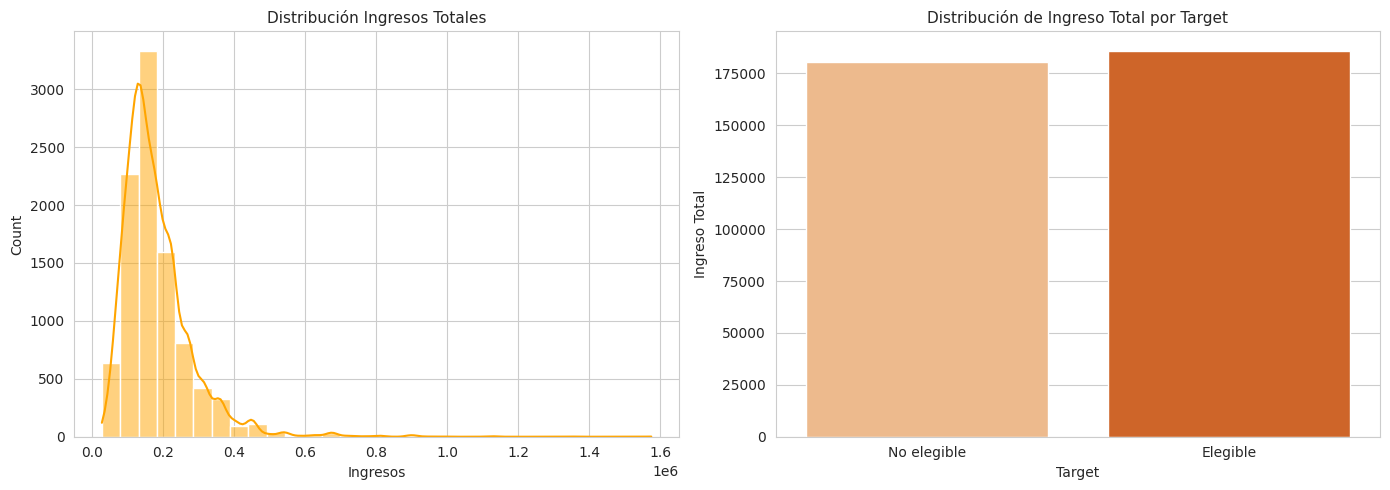

In [65]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
#Distribución de Ingresos Totales
sns.histplot(df['Total_income'], kde=True, bins=30, color='orange', ax=axes[0])
axes[0].set_ylabel('Count', size=10)
axes[0].set_xlabel('Ingresos')
axes[0].set_title('Distribución Ingresos Totales', size=11)
#Distribución de Ingreso Total por Target
sns.barplot(data=df, x='Target', y='Total_income', hue='Target', palette='Oranges', errorbar=None, ax=axes[1], legend=False)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No elegible', 'Elegible'])
axes[1].set_title('Distribución de Ingreso Total por Target', size=11)
axes[1].set_xlabel('Target')
axes[1].set_ylabel('Ingreso Total', size=10)
plt.tight_layout()
plt.show()

>La distribución de ingresos totales por target es bastante uniforme, aunque los clientes elegibles superan en número a los clientes no elegibles.

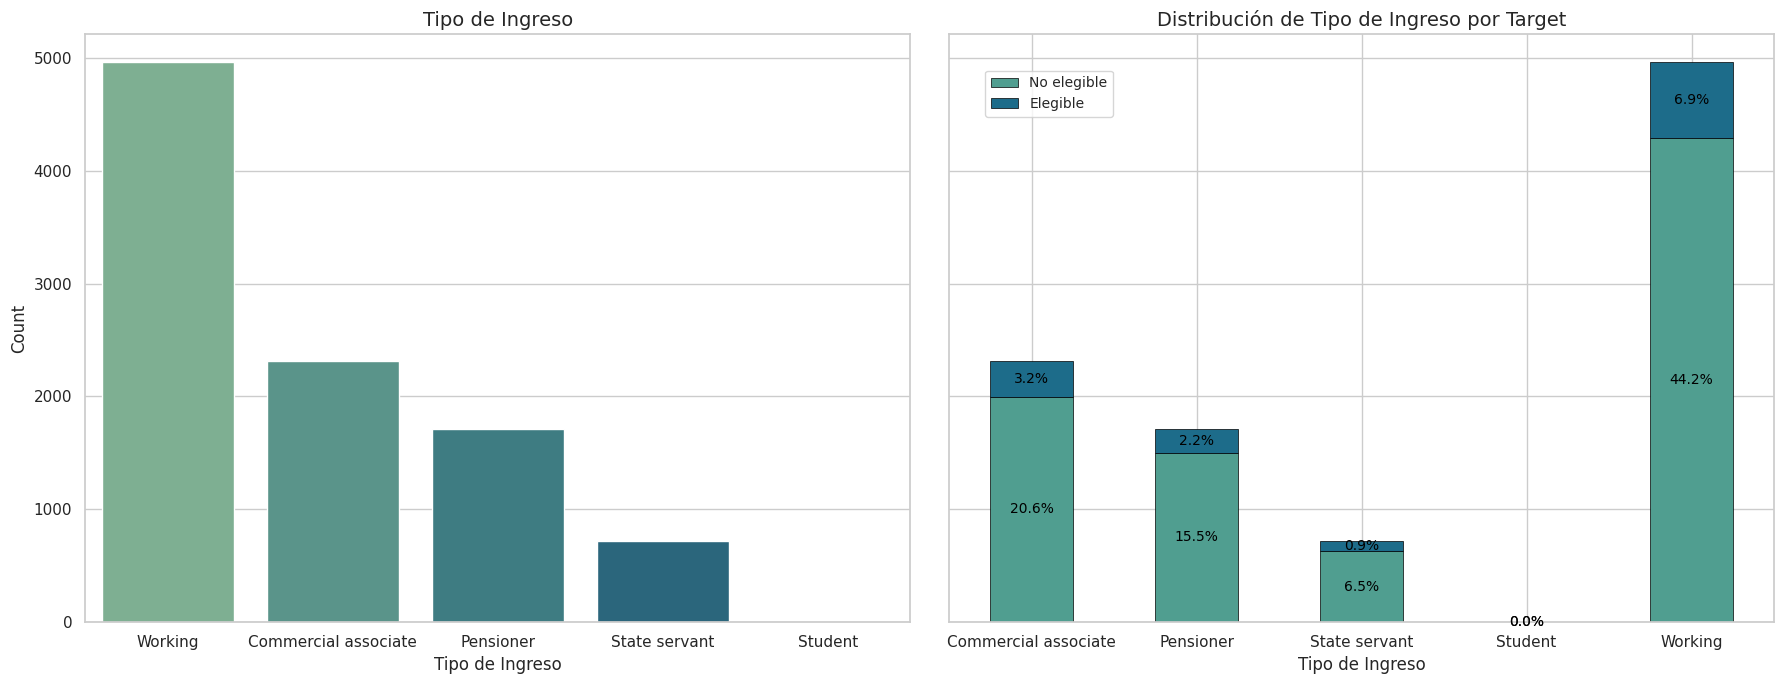

In [140]:
sns.set_style('whitegrid')
fig, axs = plt.subplots(1, 2, figsize=(18, 7), sharey=True)
# Distribución por Tipo de Ingreso
incometype = df['Income_type'].value_counts()
incometype_df = pd.DataFrame(incometype).reset_index()
incometype_df.columns = ['Income_type', 'Count']
sns.barplot(data=incometype_df, x='Income_type', y='Count', hue='Income_type', palette='crest', ax=axs[0], legend=False)
axs[0].set_xlabel('Tipo de Ingreso', size=12)
axs[0].set_ylabel('Count')
axs[0].set_title('Tipo de Ingreso', size=14)
# Distribución de Tipo de Ingreso por Target
type_income_target_counts = df.groupby(['Income_type', 'Target']).size().unstack().fillna(0)
palette = sns.color_palette('crest', n_colors=2)
ax = type_income_target_counts.plot(kind='bar', stacked=True, color=palette, edgecolor='black', linewidth=0.5, ax=axs[1])
axs[1].set_title('Distribución de Tipo de Ingreso por Target', size=14)
axs[1].set_xlabel('Tipo de Ingreso')
axs[1].set_ylabel('Count', size=12)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=0, ha='center', fontsize=11)

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    total_height = sum(p.get_height() for p in ax.patches if p.get_x() == p.get_x() and p.get_width() == width)
    if total_height > 0:
        percentage = f'{(height / total_height * 100):.1f}%'
    else:
        percentage = '0%'
    y = p.get_y() + height / 2
    ax.text(x, y, percentage, ha='center', va='center', fontsize=10, color='black')

ax.legend(['No elegible', 'Elegible'], loc='upper left', fontsize=10, bbox_to_anchor=(0.035, 0.95))
plt.tight_layout()
plt.show()

>Las personas que trabajan son las con más ingresos mientras que los estudiantes presentan nulos ingresos.

>Los clientes elegibles representan un mayor porcentaje en las ocupaciones analizadas, mientras que los clientes no elegibles muestran porcentajes considerablemente más bajos en cada una de ellas.

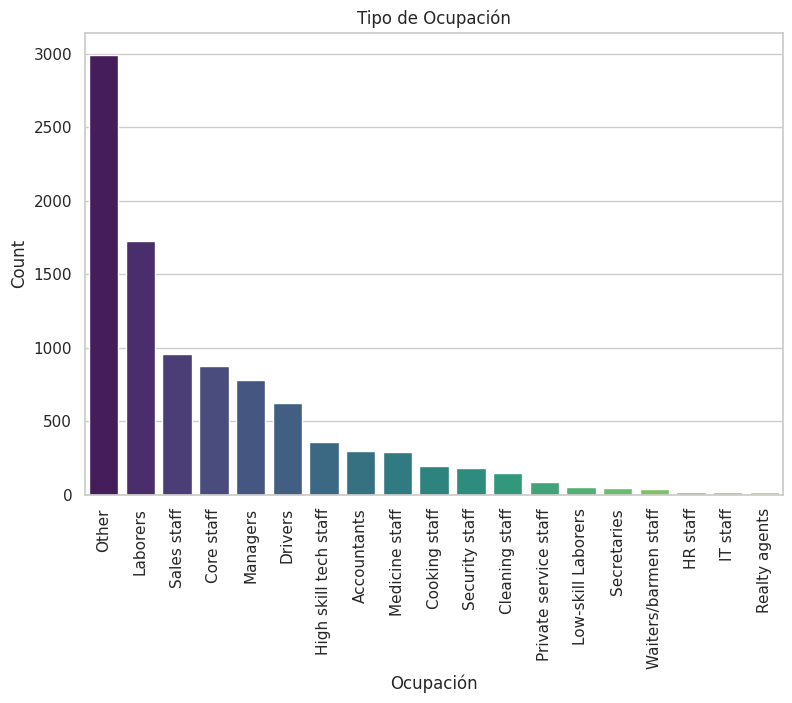

In [142]:
#Distribución por Ocupación
occupation = df['Occupation_type'].value_counts()
occupation_df = pd.DataFrame(occupation).reset_index()
occupation_df.columns = ['Occupation_type', 'Count']
sns.set_style('whitegrid')
plt.figure(figsize=(9, 6))
sns.barplot(data=occupation_df, x='Occupation_type', y='Count', hue='Occupation_type', palette='viridis', legend=False)
plt.xlabel('Ocupación')
plt.ylabel('Count')
plt.title('Tipo de Ocupación')
plt.xticks(rotation=90)
plt.show()

>Dentro de los 19 tipo de ocupaciones, la categoría Otros es la más frecuente dentro de los clientes.

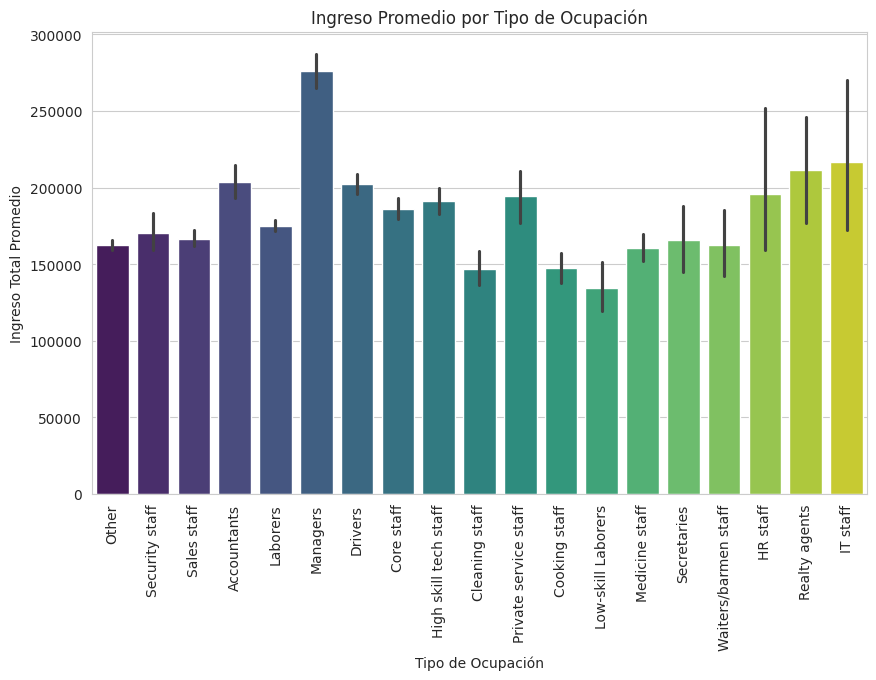

In [109]:
#Distribución Ingreso Promedio por Tipo de Ocupación
plt.figure(figsize=(10, 6))
sns.barplot(x='Occupation_type', y='Total_income', data=df, hue='Occupation_type', estimator=np.mean, palette='viridis')
plt.title('Ingreso Promedio por Tipo de Ocupación')
plt.xlabel('Tipo de Ocupación')
plt.ylabel('Ingreso Total Promedio')
plt.xticks(rotation=90)
plt.show()

>Dentro de los tipos de ocupación, los Managers tienen el ingreso promedio más alto, mientras que los trabajadores menos calificados presentan el ingreso promedio más bajo.

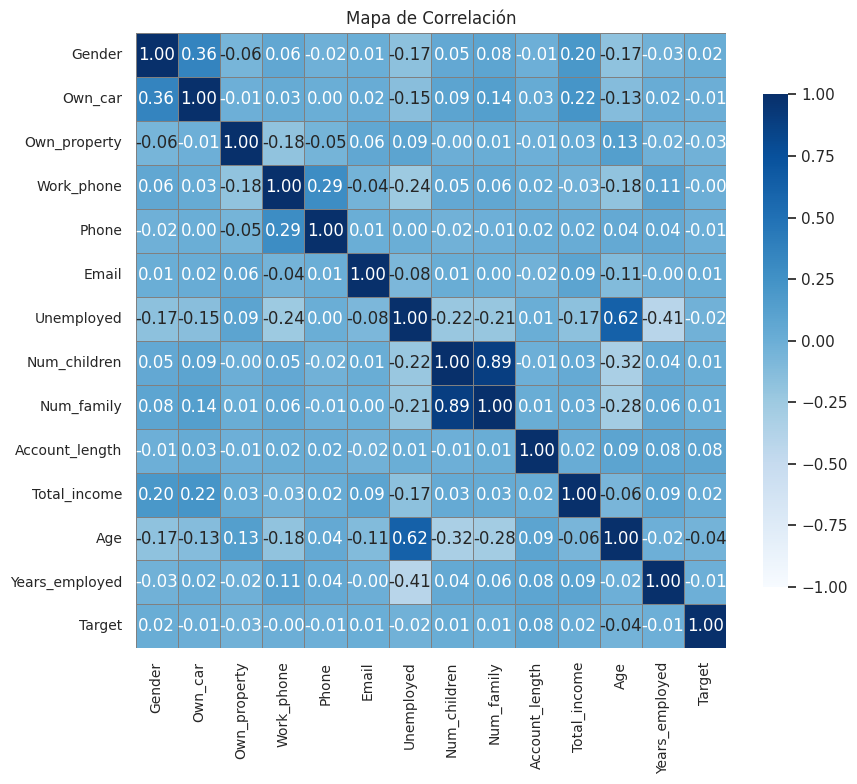

In [125]:
caract_num = df.select_dtypes(include=['number'])
corr_matrix = caract_num.corr()
plt.figure(figsize=(9, 8))

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='Blues', vmin=-1, vmax=1, center=0, linewidths=0.5, linecolor='gray',
            cbar_kws={"shrink": .8})
plt.title('Mapa de Correlación', size=12)
plt.xticks(size=10, rotation=90)
plt.yticks(size=10, rotation=0)
plt.tight_layout()
plt.show()

>El Target presenta una correlación extremadamente baja con todas las características.

>La mayor correlación se observa con la duración de la cuenta del individuo en un banco o institución financiera, seguida por el correo electrónico, el número de hijos y el número de integrantes en la familia. La correlación más baja se encuentra con la edad.



**Modelos predictivos**

In [ ]:
y = df['Target']
X = df.drop(columns = 'Target')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore' , sparse=False)

In [ ]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [ ]:
cat_tuple = (ohe, cat_selector)
num_tuple = (scaler, num_selector)

In [ ]:
col_transformer = make_column_transformer(cat_tuple, num_tuple, remainder = 'passthrough')

In [ ]:
col_transformer.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7a5b80b8b760>),
                                ('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7a5b80b8b2b0>)])

In [ ]:
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)

In [ ]:
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)

All data in X_train_processed are float64
All data in X_test_processed are float64


Decision Tree

In [ ]:
dec_tree = DecisionTreeClassifier(random_state=42 , max_depth=2)
dec_tree.fit(X_train_processed, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
dec_tree_train_score = dec_tree.score(X_train_processed, y_train).round(2)
print('Train:', dec_tree_train_score)
dec_tree_test_score = dec_tree.score(X_test_processed, y_test).round(2)
print('Test:', dec_tree_test_score)

Train: 0.87
Test: 0.85


Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_processed, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf_train_score = rf.score(X_train_processed, y_train).round(2)
print('Train:', rf_train_score)
rf_test_score = rf.score(X_test_processed, y_test).round(2)
print('Test:', rf_test_score)

Train: 1.0
Test: 0.86


Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train_processed, y_train)

GradientBoostingClassifier()

In [ ]:
gb_train_score = gb.score(X_train_processed, y_train).round(2)
print('Train:', gb_train_score)
gb_test_score = gb.score(X_test_processed, y_test).round(2)
print('Test:', gb_test_score)

Train: 0.88
Test: 0.86


**Métricas Modelos**

In [ ]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()}

results = []
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    results.append([name, accuracy, precision, recall])

metricas = pd.DataFrame(results, columns=[' ', 'Accuracy', 'Precision', 'Recall']).round(2)
metricas = metricas.set_index(' ').T
print(metricas)

           Decision Tree  Random Forest  Gradient Boosting
Accuracy            0.76           0.86               0.86
Precision           0.16           1.00               0.75
Recall              0.15           0.01               0.01


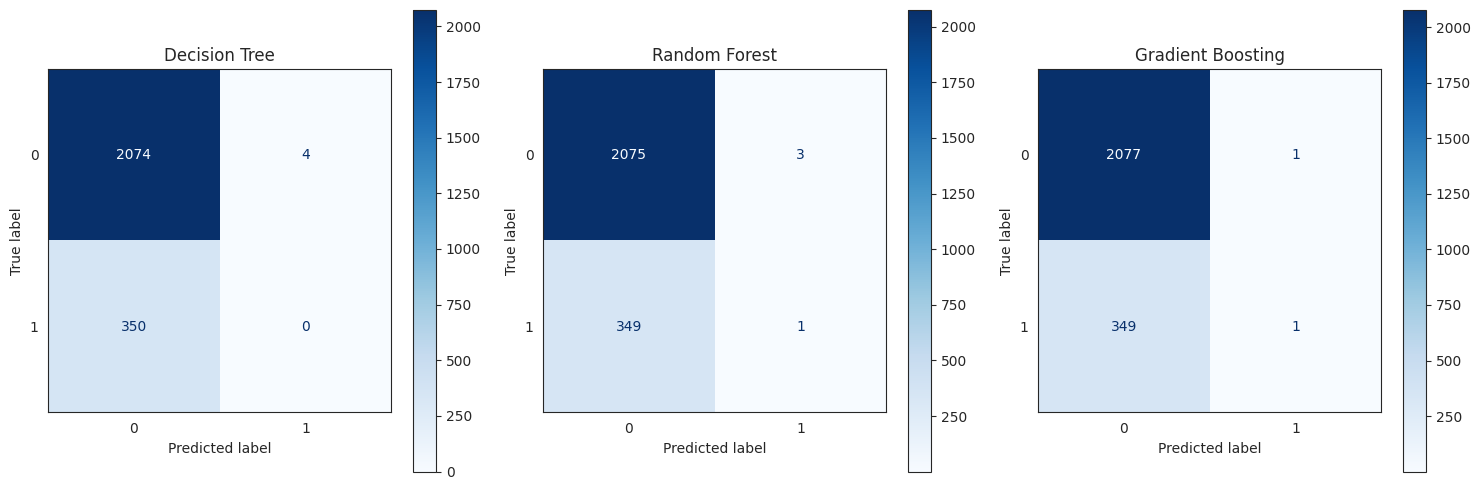

In [ ]:
sns.set_style('white')
models = [dec_tree, rf, gb]
model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (model, name) in enumerate(zip(models, model_names)):
    y_pred = model.predict(X_test_processed)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', ax=axes[i])
    axes[i].set_title(name)

plt.tight_layout()
plt.show()

**Resultados Modelos**

**Decision Tree**

- La baja precisión y recall indican que el modelo no es eficiente en distinguir entre los clientes elegibles e inelegibles de manera confiable.

**Random Forest**

- Tiene la mejor precisión entre los modelos, lo que indica que cuando predice un cliente como elegible, es más probable que realmente lo sea. Presenta un recall extremadamente bajo, casi todos los clientes realmente elegibles son clasificados incorrectamente como inelegibles. La alta precisión es buena para evitar falsos positivos, pero el bajo recall es un problema si el objetivo es maximizar la inclusión de todos los clientes potencialmente buenos.

**Gradient Boosting**

- Presenta una precisión razonablemente buena, lo que significa que las pocas predicciones positivas que hace tienden a ser correctas, sin embargo, no logra identificar correctamente a ningún cliente elegible. La precisión es útil, pero su recall extremadamente bajo significa que el modelo falla en identificar a clientes que deberían recibir una tarjeta de crédito.


**Recomendación del Mejor Modelo**

En el contexto de otorgar tarjetas de crédito, donde tanto la inclusión de clientes elegibles como la prevención de otorgar crédito a clientes no elegibles son importantes, Random Forest se presenta como el mejor modelo. A pesar de su bajo recall, tiene la mayor precisión y accuracy, lo que indica que es menos probable que cometa errores al identificar a un cliente como elegible. Sin embargo, el bajo recall debe ser abordado para mejorar la capacidad del modelo de capturar más verdaderos positivos.

En resumen, aunque Random Forest tiene sus desventajas, es el mejor modelo para evitar errores y mantener una alta precisión. Sin embargo, sería útil buscar formas de mejorar su capacidad para identificar a más clientes elegibles sin disminuir su accuracy, haciendo el modelo más completo.






